In [1]:
import numpy as np
import pandas as pd
import re
from scipy.stats import pearsonr,spearmanr

In [2]:
path_1 = "C:\sun_project\sun_project\gong_108.txt"
path_2 = "C:/sun_project/sun_project/radio.txt1"

In [7]:
f1 = pd.read_table(path_1,delim_whitespace=True, names=('index', 'y1', 'm1', 'd1','y2','m2','d2'))
f2 = pd.read_table(path_2,delim_whitespace=True, names=('y','m','d','activity'))
f2

,y,m,d,activity
0,1950,1,1,147.1
1,1950,1,3,150.1
2,1950,1,4,145.1
3,1950,1,5,148.4
4,1950,1,6,140.8
...,...,...,...,...
25221,2020,4,20,68.9
25222,2020,4,21,69.8
25223,2020,4,22,71.4
25224,2020,4,23,69.5


In [38]:
sum1 = 0
l = []
for r in f1.iloc[:,1:].values:
    i = next(iter(f2[(f2['y']==r[0]) & (f2['m']==r[1]) & (f2['d'] ==r[2])].index),'no match')
    j = next(iter(f2[(f2['y']==r[3]) & (f2['m']==r[4]) & (f2['d'] ==r[5])].index),'no match')
    m = f2.loc[i:j,'activity'].mean()
    l.append(m)
l = l[:251]
print(len(l))

251


In [72]:
dataframe2 = pd.DataFrame({'Mean of solar activity':l})

In [40]:
dataframe2.to_csv('C:\sun_project\Activity.csv', index = False)

In [68]:
freqshift = pd.read_csv('C:\sun_project\correct_order_shift.csv',index_col=False)
arr = freqshift.loc[0].values #frequency shift data

In [67]:
pear , p = pearsonr(l[:248],arr)
pear

0.9874382564303334

Plotting Activity vs Time

In [3]:
import matplotlib.pyplot as plt

In [42]:
at = pd.DataFrame({})
for i in range(0,251):
    at[str(i+1)] = pd.Series(dataframe2.values[i])
at

,1,2,3,4,5,6,7,8,9,10,...,242,243,244,245,246,247,248,249,250,251
0,76.84537,75.111111,74.84537,74.499074,73.621296,71.207407,70.486111,69.936111,70.603704,71.607407,...,71.565455,71.960185,70.586111,69.491667,68.758333,68.247222,68.176087,68.650725,69.016667,69.618519


Text(0, 0.5, 'Activity Index')

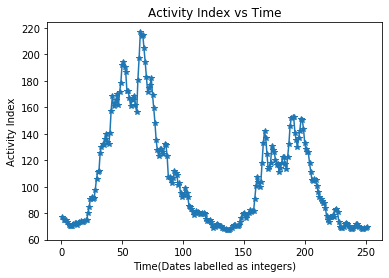

In [43]:
at.columns = at.columns.astype(int)
at.loc[0].plot(marker = '*')
plt.title("Activity Index vs Time")
plt.xlabel("Time(Dates labelled as integers)")
plt.ylabel("Activity Index")

In [10]:
at.to_csv('C:/sun_project/correct_order_activity.csv',index = False)

Finding the mean activity from Mgii dataset

In [4]:
path_3 = 'C:/sun_project/sun_project/Mgii_Bremen.txt1'

In [5]:
f3 = pd.read_table(path_3,delim_whitespace=True, names=('y','m','d','activity'))
f3

,y,m,d,activity
0,1978,11,7,0.16402
1,1978,11,8,0.16382
2,1978,11,9,0.16373
3,1978,11,10,0.16334
4,1978,11,11,0.16214
...,...,...,...,...
15155,2020,5,5,0.15153
15156,2020,5,6,0.15126
15157,2020,5,7,0.15126
15158,2020,5,8,0.15133


In [8]:
l1 = []
for r in f1.iloc[:,1:].values:
    i = next(iter(f3[(f3['y']==r[0]) & (f3['m']==r[1]) & (f3['d'] ==r[2])].index),'no match')
    j = next(iter(f3[(f3['y']==r[3]) & (f3['m']==r[4]) & (f3['d'] ==r[5])].index),'no match')
    m = f3.loc[i:j,'activity'].mean()
    l1.append(m)
print(len(l1))

309


In [77]:
pearmg , gh = pearsonr(l1[:248],arr)
pearmg # pearson's correlation between frequency shift and mgii activity

0.9946326847863334

In [78]:
spearmg , fg = spearmanr(l1[:248],arr)
spearmg

0.9906660729374335

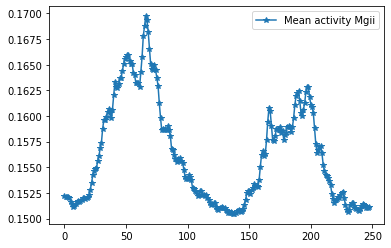

In [9]:
mgiidf = pd.DataFrame({'Mean activity Mgii':l1[:248]})
mgiidf.plot(y='Mean activity Mgii',marker="*",kind = "line")

Finding the mean activity from ssn dataset

In [11]:
path_4 = 'C:/sun_project/sun_project/ssn_SIDC.txt1'

In [12]:
f4 = pd.read_table(path_4,delim_whitespace=True, names=('y','m','d','activity'))
f4

,y,m,d,activity
0,1901,1,1,0
1,1901,1,2,0
2,1901,1,3,0
3,1901,1,4,0
4,1901,1,5,0
...,...,...,...,...
43459,2019,12,27,0
43460,2019,12,28,0
43461,2019,12,29,0
43462,2019,12,30,0


In [69]:
l2 = []
for r in f1.iloc[:,1:].values:
    i = next(iter(f4[(f4['y']==r[0]) & (f4['m']==r[1]) & (f4['d'] ==r[2])].index),'no match')
    j = next(iter(f4[(f4['y']==r[3]) & (f4['m']==r[4]) & (f4['d'] ==r[5])].index),'no match')
    m = f4.loc[i:j,'activity'].mean()
    l2.append(m)
l2 = l2[:250]
print(len(l2))

250


In [18]:
ssndf = pd.DataFrame({'Mean activity ssn':l2})
ssndf

,Mean activity ssn
0,19.953704
1,18.287037
2,19.898148
3,20.944444
4,20.101852
...,...
245,0.805556
246,0.685185
247,0.675926
248,0.792208


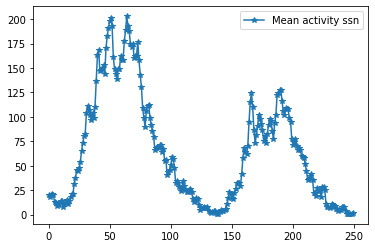

In [23]:
ssndf.plot(y='Mean activity ssn',kind ='line',marker='*')

In [70]:
pe , o = pearsonr(l2[:248],arr)
pe #pearson's correlation coefficient between ssn activity and frequency shift

0.9798000895960419

In [71]:
spea, k = spearmanr(l2[:248],arr)
spea

0.9819139357144375